In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/Users/jasminezhou/anaconda/envs/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Preprocessing data

In [2]:
# import data
training_data = pd.read_csv('case2_training.csv', header=0)
training_data = training_data.dropna() # Return object with labels on given axis omitted where alternately any or all of the data are missing
print(training_data.shape)
print(list(training_data.columns))

(50000, 10)
['ID', 'Region', 'Date', 'Weekday', 'Apartment', 'Beds', 'Review', 'Pic Quality', 'Price', 'Accept']


In [3]:
training_data.head()

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept
0,1,4,32,5,1,1,4.526975,0.739994,230.552998,0
1,2,2,87,4,1,1,4.548455,0.862642,348.203425,0
2,3,5,277,5,1,2,4.965732,0.515548,430.462327,0
3,4,3,246,2,1,1,4.752735,0.561547,149.305433,1
4,5,1,155,2,1,2,3.890960,0.817142,165.264184,1


In [4]:
training_data['Accept'].value_counts()

0    36484
1    13516
Name: Accept, dtype: int64

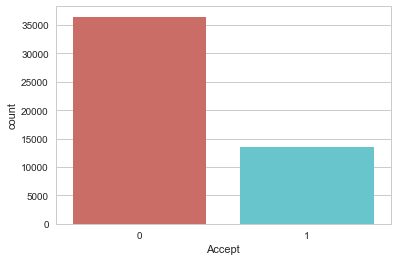

<Figure size 432x288 with 0 Axes>

In [5]:
sns.countplot(x='Accept',data=training_data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [6]:
training_data.groupby('Accept').mean()

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price
Accept,,,,,,,,,
0,25003.792402,5.504057,182.335599,3.993888,0.801831,1.494134,4.510126,0.750389,333.652046
1,24991.612755,5.472255,184.143460,3.989716,0.801864,1.500148,4.507445,0.749916,271.915549


In [7]:
cols=['ID', 'Region', 'Date', 'Weekday', 'Apartment', 'Beds', 'Review', 'Pic Quality', 'Price']
X=training_data[cols]
y=training_data['Accept']
print(X.shape)
print(y.shape)

(50000, 9)
(50000,)


### Split the train samples to 0.75 train data and 0.25 test data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Neural Network Model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

# create a Sequential model by passing a list of layer instances to the constructor
model = Sequential()

# Add fully connected layer with a ReLU activation function and L2 regularization
model.add(Dense(64, input_dim=9, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))

# Add fully connected layer with a sigmoid activation function
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

# Compilation
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training
model.fit(X_train, y_train, epochs=20, batch_size=128)
score = model.evaluate(X_test, y_test, batch_size=128)
print(score)

Using TensorFlow backend.


Epoch 1/20
37500/37500 [==============================] - 1s 31us/step - loss: 5.4304 - acc: 0.6837
Epoch 2/20
37500/37500 [==============================] - 1s 15us/step - loss: 4.6095 - acc: 0.7219
Epoch 3/20
37500/37500 [==============================] - 1s 16us/step - loss: 4.5134 - acc: 0.7234
Epoch 4/20
37500/37500 [==============================] - 1s 16us/step - loss: 4.4629 - acc: 0.7251
Epoch 5/20
37500/37500 [==============================] - 1s 15us/step - loss: 4.4378 - acc: 0.7254
Epoch 6/20
37500/37500 [==============================] - 1s 16us/step - loss: 4.4663 - acc: 0.7222
Epoch 7/20
37500/37500 [==============================] - 1s 16us/step - loss: 4.4013 - acc: 0.7249
Epoch 8/20
37500/37500 [==============================] - 1s 15us/step - loss: 4.3774 - acc: 0.7244: 0s - loss: 4.3774 - acc: 0.72
Epoch 9/20
37500/37500 [==============================] - 1s 14us/step - loss: 4.3366 - acc: 0.7251
Epoch 10/20
37500/37500 [==============================] - 1s 15us/st

### Logistic regression model fitting

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)
print(y_pred[:50])
print(y_proba[:50])
print(y_proba.shape)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[0.73487808 0.26512192]
 [0.83876604 0.16123396]
 [0.7623735  0.2376265 ]
 [0.81299264 0.18700736]
 [0.7356944  0.2643056 ]
 [0.91379494 0.08620506]
 [0.57363658 0.42636342]
 [0.60861017 0.39138983]
 [0.58731076 0.41268924]
 [0.67178701 0.32821299]
 [0.86769064 0.13230936]
 [0.86400745 0.13599255]
 [0.83914291 0.16085709]
 [0.67392085 0.32607915]
 [0.65230471 0.34769529]
 [0.77760989 0.22239011]
 [0.82782808 0.17217192]
 [0.60652009 0.39347991]
 [0.83095898 0.16904102]
 [0.65712175 0.34287825]
 [0.68735595 0.31264405]
 [0.48383492 0.51616508]
 [0.48956638 0.51043362]
 [0.82954171 0.17045829]
 [0.94034673 0.05965327]
 [0.80297384 0.19702616]
 [0.44429737 0.55570263]
 [0.69028207 0.30971793]
 [0.80605595 0.19394405]
 [0.57807331 0.42192669]
 [0.51299471 0.48700529]
 [0.82893061 0.17106939]
 [0.62309564 0.37690436]
 [0.80953116 0.19046884]
 [0.77597135 0.22402865]
 [0.6933175  0.3066825

### Cross Validation

In [12]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.733


### Confustion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8804  296]
 [3046  354]]


### Accuracy

In [14]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(score))

Accuracy of logistic regression classifier on test set: 0.73


### Compute precision, recall, F-measure and support

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.97      0.84      9100
          1       0.54      0.10      0.17      3400

avg / total       0.69      0.73      0.66     12500



### ROC Curvefrom sklearn import metrics

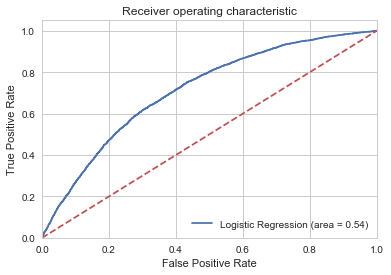

In [16]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Testing

In [17]:
# import testing data
testing_data = pd.read_csv('case2_testing.csv', header=0)
testing_data = testing_data.dropna() # Return object with labels on given axis omitted where alternately any or all of the data are missing
print(testing_data.shape)
print(list(testing_data.columns))

# prediction
y_pred = logreg.predict(testing_data)
y_proba = logreg.predict_proba(testing_data)

(20000, 9)
['ID', 'Region', 'Date', 'Weekday', 'Apartment', 'Beds', 'Review', 'Pic Quality', 'Price']


In [18]:
# get the probability
prob = y_proba[:,1]
print(prob.shape)
print(y_pred[:30])
print(prob[:30])

(20000,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0.20837965 0.33139786 0.14930905 0.41471315 0.25382294 0.17851786
 0.22259067 0.22685369 0.2166509  0.20096249 0.18730184 0.32567158
 0.20175305 0.35784456 0.04730895 0.35158369 0.16575886 0.19981088
 0.19419583 0.1586438  0.12420745 0.18056067 0.42509153 0.44575915
 0.36436425 0.36777932 0.53853025 0.17002693 0.3078989  0.22374208]


### Save result to csv file

In [19]:
result = {'ID': testing_data['ID'], 'Probability': prob}
result = pd.DataFrame(result)
result = result.to_csv('result.csv', index=False)